# Scientific visualisation

## 1. Graphical interface (GUI):

VisIt (physics): https://visit-dav.github.io/visit-website/releases-as-tables/

Paraview (ingeneering): https://www.paraview.org/download/

**Note:** 2D and 3D visualisation, but they provided limited capability for data analysis


## 2. pyvista:

Documentation: https://docs.pyvista.org/


## Installation:

conda install -c conda-forge pyvista

pip install pyvista

pip install ipyvtklink

## 3. Visualization ToolKit (VTK) format
https://vtk.org/

This format is an open-source data format, developed by Kitware, and widely used in computational fluid dynamics and computer graphics applications. There are two sub-formats, legacy and XML.

## VTK file structure:

1. File version and ID.

2. Header, comments with informaton on the dataset.

3. Data type, which can be Binary or ASCII.

4. Domain structure, mesh/grid information:

### DATASET

STRUCTURED_GRID

UNSTRUCTURED_GRID

**RECTILINEAR_GRID**

POLYDATA

FIELD

- Coordinates, Dimensions, Grid spacing.

### Attributes
Values stored at grid cells, e.g. scalars, vectors, tensors.


Imagen tomada de: http://victorsndvg.github.io/FEconv/formats/vtk.xhtml

In [1]:
import pyvista as pv

import numpy as np
import matplotlib.pyplot as plt

In [3]:
mesh = pv.read("./TURB_DRIVE_SUP/data.0010.vtk")

In [4]:
print(mesh)

RectilinearGrid (0x11f801f30)
  N Cells:	2500
  N Points:	2601
  X Bounds:	-2.000e+00, 2.000e+00
  Y Bounds:	-2.000e+00, 2.000e+00
  Z Bounds:	0.000e+00, 0.000e+00
  Dimensions:	51, 51, 1
  N Arrays:	5



In [5]:
print(mesh.dimensions)

(51, 51, 1)


In [7]:
print(mesh.n_cells)

2500


In [8]:
print(mesh.n_points)

2601


In [9]:
print(mesh.n_arrays)

5


In [10]:
print(mesh.bounds)

(-2.0, 2.0, -2.0, 2.0, 0.0, 0.0)


In [25]:
print(mesh.bounds[0])

-2.0


In [12]:
print(mesh.center)

[0.0, 0.0, 0.0]


In [13]:
print(mesh.cell_data)

pyvista DataSetAttributes
Association     : CELL
Active Scalars  : rho
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays :
    rho                     float32  (2500,)              SCALARS
    vx1                     float32  (2500,)
    vx2                     float32  (2500,)
    Bx1                     float32  (2500,)
    Bx2                     float32  (2500,)


In [14]:
rho = pv.get_array(mesh, "rho", preference = 'cell')

In [15]:
print(rho.shape)

(2500,)


In [16]:
print(mesh.dimensions[0] - 1)

50


In [17]:
rho_2D = rho.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

In [18]:
print(rho_2D.shape)

(50, 50)


## 2D plotting

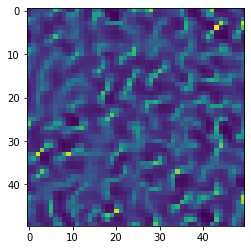

In [22]:
%matplotlib inline

plt.imshow(rho_2D)

## Grid

In [31]:
x = np.linspace(mesh.bounds[0], mesh.bounds[1], mesh.dimensions[0] - 1)
y = np.linspace(mesh.bounds[2], mesh.bounds[3], mesh.dimensions[1] - 1)

print(y)

[-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]


In [32]:
X, Y = np.meshgrid(x, y)

In [33]:
print(X.shape)

(50, 50)


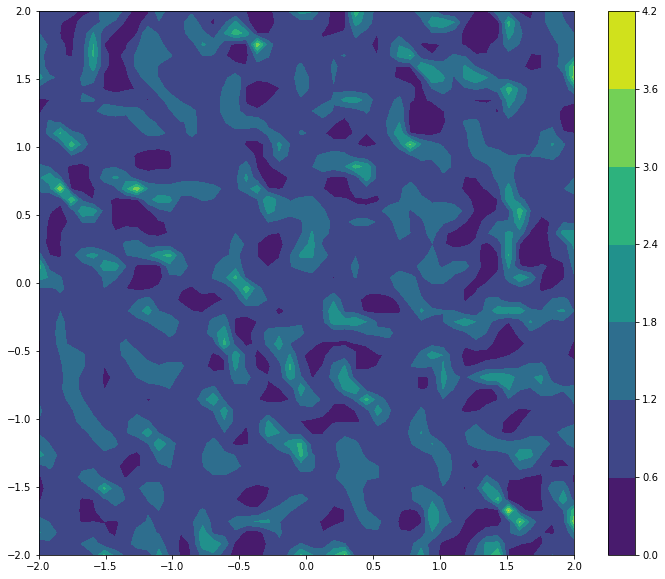

In [40]:
plt.figure(figsize = (12,10))

Z = plt.contourf(X, Y, rho_2D, 5)

plt.colorbar(Z)

plt.show()

In [41]:
vx1 = pv.get_array(mesh, "vx1", preference = 'cell')

vx2 = pv.get_array(mesh, "vx2", preference = 'cell')

In [43]:
modulus_velocity = np.sqrt(vx1**2 + vx2**2)

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html

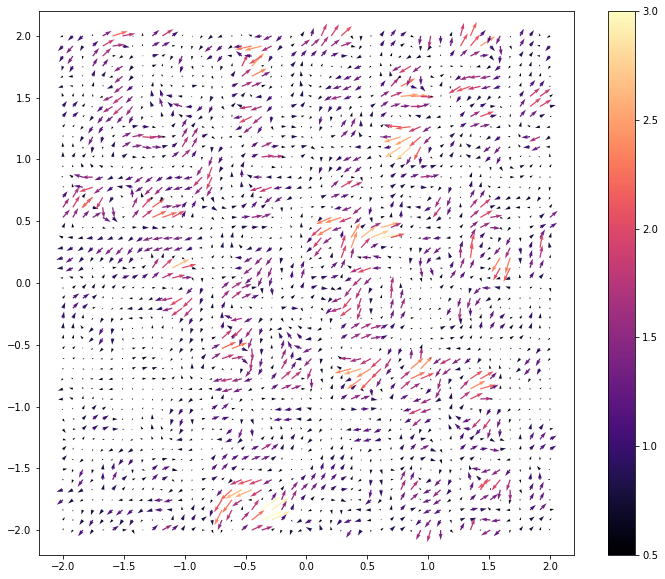

In [47]:
plt.figure(figsize = (12,10))

Z = plt.quiver(X, Y, vx1, vx2, modulus_velocity, cmap = 'magma', clim=(0.5,3))

plt.colorbar(Z)

plt.show()

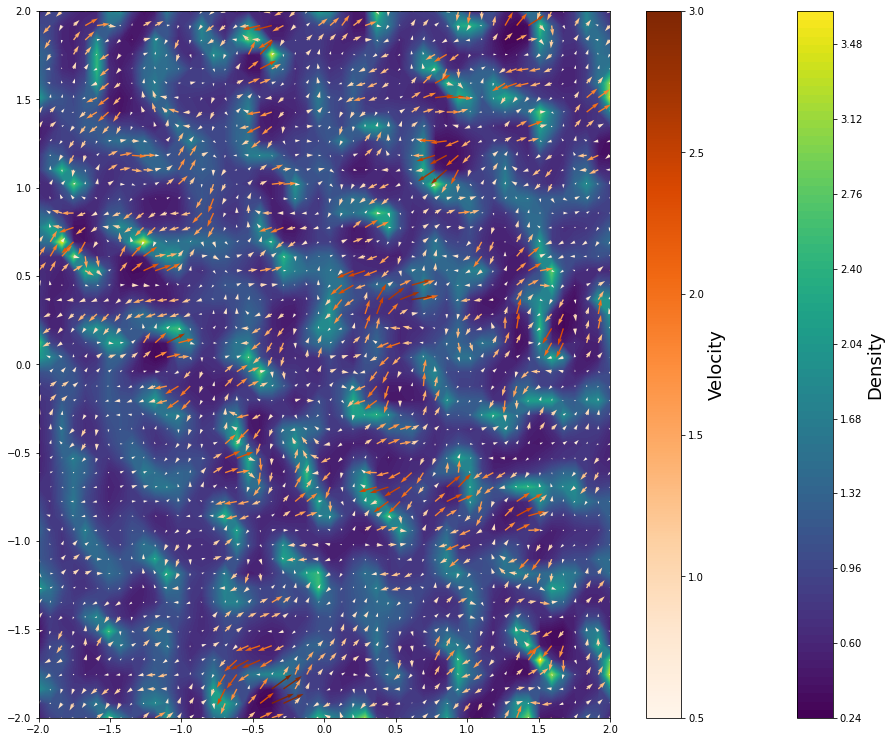

In [55]:
plt.figure(figsize = (16,13))

Z1 = plt.contourf(X, Y, rho_2D, 100, cmap = 'viridis')
Z2 = plt.quiver(X, Y, vx1, vx2, modulus_velocity, cmap = 'Oranges', clim=(0.5,3))

CB1 = plt.colorbar(Z1)
CB2 = plt.colorbar(Z2)

CB1.set_label('Density', size=18)
CB2.set_label('Velocity', size=18)
plt.show()